In [52]:
import pandas as pd
import numpy as np 
application = pd.read_csv('application_record.csv')
credit = pd.read_csv('credit_record.csv')



In [53]:
import seaborn as sns #Use this to tell use about significance
import matplotlib.pyplot as plt

In [54]:
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline


In [55]:
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [56]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [57]:
#Set the defaults

credit['STATUS'] = credit['STATUS'].replace(['C'],0)
credit['STATUS'] = credit['STATUS'].replace(['X'],0)
credit['STATUS'] = credit['STATUS'].apply(pd.to_numeric) 
credit['STATUS'] = np.where(credit['STATUS']<1, 0, 1)

In [58]:
len(credit)


1048575

In [59]:
target_light = credit.drop(['MONTHS_BALANCE'],axis=1)
target_clean = target_light.drop_duplicates()
len(target_clean)

51334

In [134]:
unique = {}
for index, x in target_clean.iterrows():
    if x['ID'] not in unique:
        unique[x['ID']] = x['STATUS']
    
    if x['STATUS'] > 0:
        unique[x['ID']] = 1
        

In [135]:
target_unique = pd.DataFrame(unique.items(), columns=['ID', 'STATUS'])

In [136]:
len(target_unique)

45985

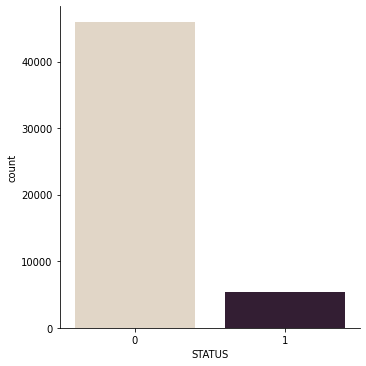

In [137]:
sns.catplot(x="STATUS", kind="count", palette="ch:.25", data=target_clean)


In [22]:
#2 Categories, good and bad

#Good marked as 0
#Best is paid balance
# C
#Second best
# X No balance

#0, 1 month balance




#Bad marked as 1
#Bad, late payments, 5 is worst
#2, 3, 4, 5




In [138]:
combined_df = application.merge(target_unique, on='ID')
combined_df = combined_df.drop(['ID'],axis=1)

In [139]:
combined_df=combined_df.drop_duplicates()

In [86]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11540 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          11540 non-null  object 
 1   FLAG_OWN_CAR         11540 non-null  object 
 2   FLAG_OWN_REALTY      11540 non-null  object 
 3   CNT_CHILDREN         11540 non-null  int64  
 4   AMT_INCOME_TOTAL     11540 non-null  float64
 5   NAME_INCOME_TYPE     11540 non-null  object 
 6   NAME_EDUCATION_TYPE  11540 non-null  object 
 7   NAME_FAMILY_STATUS   11540 non-null  object 
 8   NAME_HOUSING_TYPE    11540 non-null  object 
 9   DAYS_BIRTH           11540 non-null  int64  
 10  DAYS_EMPLOYED        11540 non-null  int64  
 11  FLAG_MOBIL           11540 non-null  int64  
 12  FLAG_WORK_PHONE      11540 non-null  int64  
 13  FLAG_PHONE           11540 non-null  int64  
 14  FLAG_EMAIL           11540 non-null  int64  
 15  OCCUPATION_TYPE      8015 non-null  

In [140]:
combined_df['OCCUPATION_TYPE'].value_counts()

Laborers                 2009
Sales staff              1124
Core staff               1041
Managers                  927
Drivers                   725
High skill tech staff     429
Accountants               357
Medicine staff            348
Cooking staff             226
Security staff            225
Cleaning staff            169
Private service staff      95
Low-skill Laborers         63
Secretaries                53
Waiters/barmen staff       45
HR staff                   30
IT staff                   21
Realty agents              19
Name: OCCUPATION_TYPE, dtype: int64

In [141]:
#Feature engineering

#combined the Children count more than 5 in a single bucket. 
combined_df['CNT_CHILDREN']=combined_df['CNT_CHILDREN'].apply(lambda x : 5 if x>=5 else x)


In [142]:
bins_income = [0, 20000, 40000, 60000, 121500, 160780, 225000, 300000, 500000, 1000000, 2000000, 3000000, 5000000, 6750000]

combined_df['binned'] = pd.cut(combined_df['AMT_INCOME_TOTAL'], bins_income)

In [143]:
combined_df['AGE'] = combined_df['DAYS_BIRTH']/-365

In [144]:
def fix_employ_days(days):
    if days > 0:
        return -1
    else:
        return days


combined_df['DAYS_EMPLOYED'] =  combined_df.apply(lambda x: fix_employ_days(x['DAYS_EMPLOYED']),axis=1)

combined_df['EMPLOYED_YEARS'] = combined_df['DAYS_EMPLOYED']/-365

In [145]:
bins_age = [0, 18, 25, 35, 40, 50, 60,100]
combined_df['AGE_BIN'] = pd.cut(combined_df['AGE'], bins_age)
combined_df['AGE_BIN'].value_counts(dropna=False)

(25, 35]     2885
(40, 50]     2873
(50, 60]     2533
(35, 40]     1602
(60, 100]    1191
(18, 25]      310
(0, 18]         0
Name: AGE_BIN, dtype: int64

In [146]:
pd.set_option('display.max_columns', None)
combined_df.head()



#There are lots of duplicates
#remove bad 
final_df = combined_df.loc[:, combined_df.columns != 'ID']
final_df = final_df.drop_duplicates()



In [147]:
final_df['FLAG_EMAIL'] = pd.Categorical(final_df['FLAG_EMAIL'])
final_df['FLAG_PHONE'] = pd.Categorical(final_df['FLAG_PHONE'])
final_df['FLAG_WORK_PHONE'] = pd.Categorical(final_df['FLAG_WORK_PHONE'])
final_df['FLAG_MOBIL'] = pd.Categorical(final_df['FLAG_MOBIL'])


In [148]:
missing_occupation = final_df.loc[final_df['OCCUPATION_TYPE'].isnull() & final_df['STATUS'] == 1]


In [149]:
missing_occupation.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,binned,AGE,EMPLOYED_YEARS,AGE_BIN
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1,"(300000, 500000]",32.890411,12.443836,"(25, 35]"
146,M,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-16027,-889,1,0,1,0,NaN,2.0,1,"(121500, 160780]",43.909589,2.435616,"(40, 50]"
151,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22319,-1,1,0,0,0,NaN,2.0,1,"(60000, 121500]",61.147945,0.002740,"(60, 100]"
276,M,N,Y,0,382500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21673,-1,1,0,0,0,NaN,1.0,1,"(300000, 500000]",59.378082,0.002740,"(50, 60]"
281,M,Y,N,0,225000.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-18289,-1,1,0,0,0,NaN,2.0,1,"(160780, 225000]",50.106849,0.002740,"(50, 60]"


In [150]:
# we want to imputate based on the job
#Let's cluster them

clustering_df = final_df.drop(['OCCUPATION_TYPE','STATUS','EMPLOYED_YEARS'], axis=1)



In [151]:
clustering_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,binned,AGE,AGE_BIN
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,"(300000, 500000]",32.890411,"(25, 35]"
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,"(60000, 121500]",58.832877,"(50, 60]"
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,"(225000, 300000]",52.356164,"(50, 60]"
7,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,-1,1,0,0,0,1.0,"(225000, 300000]",61.545205,"(60, 100]"
10,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,2.0,"(225000, 300000]",46.224658,"(40, 50]"


In [153]:
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=10, verbose=2, max_iter=20)
clusters = kproto.fit_predict(clustering_df, categorical=[0, 1, 2, 5,6,7,8,11,12,13,14,16,18])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 1609, ncost: 12165503281825.828
Run: 1, iteration: 2/20, moves: 514, ncost: 9269501659995.646
Run: 1, iteration: 3/20, moves: 322, ncost: 7267779621446.019
Run: 1, iteration: 4/20, moves: 487, ncost: 6541350349379.477
Run: 1, iteration: 5/20, moves: 148, ncost: 6335899887359.762
Run: 1, iteration: 6/20, moves: 15, ncost: 6333838184466.497
Run: 1, iteration: 7/20, moves: 0, ncost: 6333838184466.497
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 1816, ncost: 6772716006229.895
Run: 2, iteration: 2/20, moves: 207, ncost: 5841082476060.649
Run: 2, iteration: 3/20, moves: 91, ncost: 5704152768376.204
Run: 2, iteration: 4/20, moves: 4, ncost: 5703367387741.206
Run: 2, iteration: 5/20, moves: 0, ncost: 5703367387741.206
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/

In [154]:
final_df['clusters']=clusters

In [155]:
final_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,binned,AGE,EMPLOYED_YEARS,AGE_BIN,clusters
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1,"(300000, 500000]",32.890411,12.443836,"(25, 35]",2
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,"(60000, 121500]",58.832877,3.106849,"(50, 60]",0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,"(225000, 300000]",52.356164,8.358904,"(50, 60]",7
7,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,-1,1,0,0,0,NaN,1.0,0,"(225000, 300000]",61.545205,0.002740,"(60, 100]",7
10,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0,0,"(225000, 300000]",46.224658,2.106849,"(40, 50]",7


In [156]:

    
category_occ = {}
for x in range(0,10):
    cluster = final_df.loc[final_df['clusters'] == x]
    popular_occupation = cluster.describe(include=[np.object]).transpose().top['OCCUPATION_TYPE']
    category_occ[x]=popular_occupation



In [157]:

def replace_occ_na(occ, cluster):
    #Check for nan
    if occ != occ:
        #print (occ)
        return category_occ[cluster]
    else:
        return occ



final_df['OCCUPATION_TYPE'] = final_df.apply(lambda x: replace_occ_na(x['OCCUPATION_TYPE'],x['clusters']),axis=1)

In [158]:
final_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,binned,AGE,EMPLOYED_YEARS,AGE_BIN,clusters
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Managers,2.0,1,"(300000, 500000]",32.890411,12.443836,"(25, 35]",2
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,"(60000, 121500]",58.832877,3.106849,"(50, 60]",0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,"(225000, 300000]",52.356164,8.358904,"(50, 60]",7
7,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,-1,1,0,0,0,Laborers,1.0,0,"(225000, 300000]",61.545205,0.002740,"(60, 100]",7
10,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0,0,"(225000, 300000]",46.224658,2.106849,"(40, 50]",7


In [159]:
final_df.describe(include=[np.number]).transpose()


,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,11394.0,0.422415,0.733394,0.000000,0.000000,0.00000,1.000000,5.000000e+00
AMT_INCOME_TOTAL,11394.0,182548.498420,100577.865034,27000.000000,112500.000000,157500.00000,225000.000000,1.575000e+06
DAYS_BIRTH,11394.0,-15959.333509,4240.361917,-25152.000000,-19482.000000,-15584.00000,-12379.250000,-7.489000e+03
DAYS_EMPLOYED,11394.0,-2088.408812,2324.074028,-15713.000000,-3017.000000,-1388.00000,-352.000000,-1.000000e+00
CNT_FAM_MEMBERS,11394.0,2.187204,0.937421,1.000000,2.000000,2.00000,3.000000,2.000000e+01
STATUS,11394.0,0.210988,0.408028,0.000000,0.000000,0.00000,0.000000,1.000000e+00
AGE,11394.0,43.724201,11.617430,20.517808,33.915753,42.69589,53.375342,6.890959e+01
EMPLOYED_YEARS,11394.0,5.721668,6.367326,0.002740,0.964384,3.80274,8.265753,4.304932e+01
clusters,11394.0,3.508689,3.193896,0.000000,0.000000,3.00000,6.000000,9.000000e+00


In [160]:
from sklearn.model_selection import train_test_split

X = final_df.drop(['clusters','STATUS'], axis=1)
y = final_df['STATUS']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [161]:
import numpy as np

def get_col_names(sdf):
  n_features = sdf.shape[1]

  cat_col_names = list(sdf.select_dtypes(include=np.object).columns)
  num_col_names = list(sdf.select_dtypes(include=np.number).columns)

  print('cat_col_names: {}'.format(cat_col_names))
  print('num_col_names: {}'.format(num_col_names))
  return cat_col_names,num_col_names

cat_col_names,num_col_names = get_col_names(X_train)


cat_col_names: ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
num_col_names: ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'AGE', 'EMPLOYED_YEARS']


In [162]:
X_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,binned,AGE,EMPLOYED_YEARS,AGE_BIN
8897,M,Y,Y,0,157500.0,Commercial associate,Higher education,Civil marriage,House / apartment,-13543,-1326,1,0,0,0,Drivers,2.0,"(121500, 160780]",37.104110,3.632877,"(35, 40]"
30453,M,Y,N,0,247500.0,Commercial associate,Higher education,Married,House / apartment,-16269,-803,1,1,0,0,Drivers,2.0,"(225000, 300000]",44.572603,2.200000,"(40, 50]"
24957,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-21466,-7978,1,0,0,0,Laborers,2.0,"(121500, 160780]",58.810959,21.857534,"(50, 60]"
2350,F,N,Y,1,67500.0,Working,Higher education,Married,House / apartment,-12774,-517,1,0,0,0,High skill tech staff,3.0,"(60000, 121500]",34.997260,1.416438,"(25, 35]"
23409,F,N,N,0,128542.5,Commercial associate,Higher education,Single / not married,Rented apartment,-9351,-370,1,1,0,1,Sales staff,1.0,"(121500, 160780]",25.619178,1.013699,"(25, 35]"


In [163]:
#Target encode
import category_encoders as ce

encoder = ce.MEstimateEncoder(cols=cat_col_names)

encoder.fit(X_train, y_train)
X_cleaned = encoder.transform(X_train)




#encoder.fit(x_test, y_test_clean)
X_test_cleaned = encoder.transform(X_val)





/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
from pycaret.utils import version
version()


In [164]:
find_corr =pd.concat([X_cleaned,y_train], axis=1)

In [165]:
find_corr.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,binned,AGE,EMPLOYED_YEARS,AGE_BIN,STATUS
8897,0.214667,0.211377,0.205273,0,157500.0,0.218035,0.223023,0.227021,0.208671,-13543,-1326,1,0,0,0,0.216598,2.0,"(121500, 160780]",37.104110,3.632877,"(35, 40]",0
30453,0.214667,0.211377,0.224626,0,247500.0,0.218035,0.223023,0.209597,0.208671,-16269,-803,1,1,0,0,0.216598,2.0,"(225000, 300000]",44.572603,2.200000,"(40, 50]",1
24957,0.214667,0.211377,0.205273,0,135000.0,0.218035,0.206750,0.209597,0.208671,-21466,-7978,1,0,0,0,0.203664,2.0,"(121500, 160780]",58.810959,21.857534,"(50, 60]",0
2350,0.210172,0.211948,0.205273,1,67500.0,0.215463,0.223023,0.209597,0.208671,-12774,-517,1,0,0,0,0.219561,3.0,"(60000, 121500]",34.997260,1.416438,"(25, 35]",0
23409,0.210172,0.211948,0.224626,0,128542.5,0.218035,0.223023,0.229834,0.289694,-9351,-370,1,1,0,1,0.203501,1.0,"(121500, 160780]",25.619178,1.013699,"(25, 35]",1


In [166]:
df_num = find_corr.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,EMPLOYED_YEARS,STATUS
8897,0.214667,0.211377,0.205273,0,157500.0,0.218035,0.223023,0.227021,0.208671,-13543,-1326,0.216598,2.0,37.104110,3.632877,0
30453,0.214667,0.211377,0.224626,0,247500.0,0.218035,0.223023,0.209597,0.208671,-16269,-803,0.216598,2.0,44.572603,2.200000,1
24957,0.214667,0.211377,0.205273,0,135000.0,0.218035,0.206750,0.209597,0.208671,-21466,-7978,0.203664,2.0,58.810959,21.857534,0
2350,0.210172,0.211948,0.205273,1,67500.0,0.215463,0.223023,0.209597,0.208671,-12774,-517,0.219561,3.0,34.997260,1.416438,0
23409,0.210172,0.211948,0.224626,0,128542.5,0.218035,0.223023,0.229834,0.289694,-9351,-370,0.203501,1.0,25.619178,1.013699,1


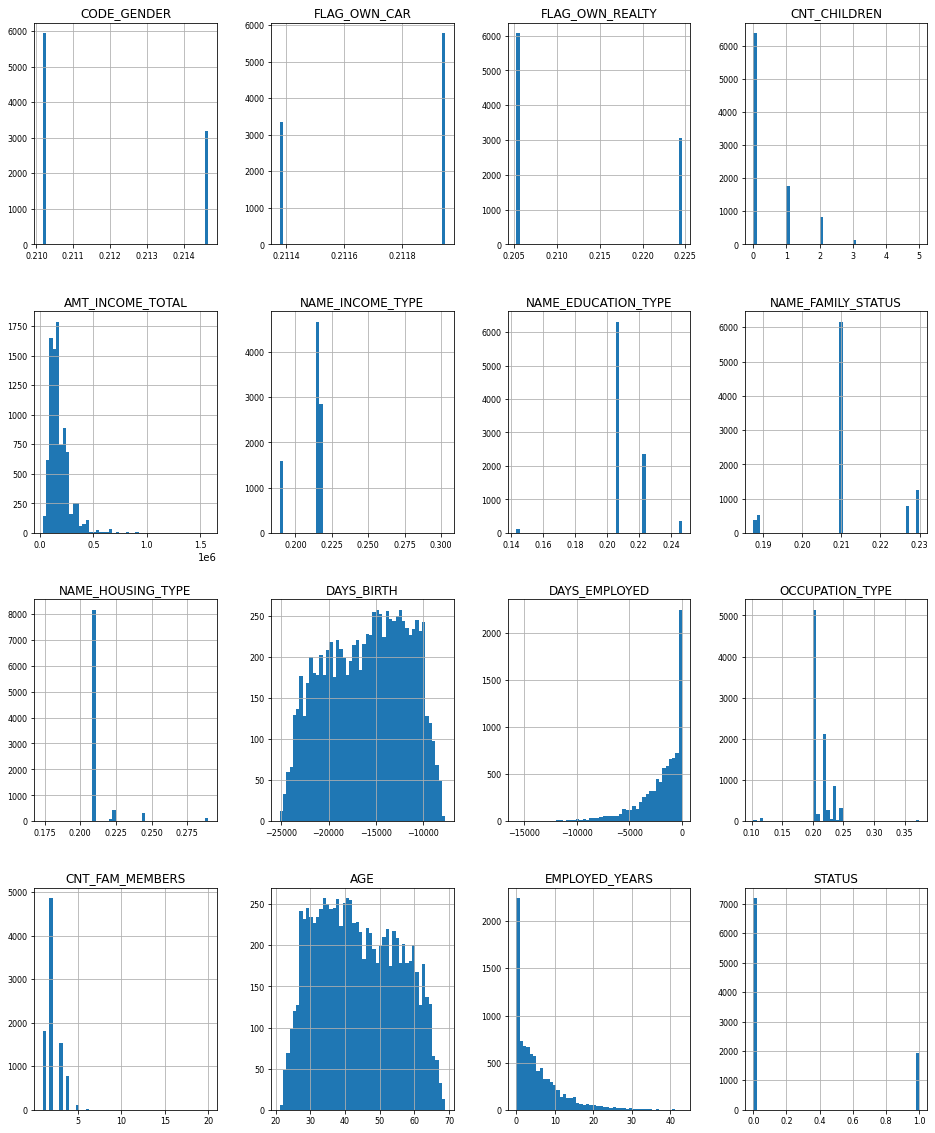

In [167]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations


In [168]:
df_num_corr = df_num.corr()['STATUS'][:-1]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.008].sort_values(ascending=False)
print("There is {} strongly correlated values with num_target:\n{}".format(len(golden_features_list), golden_features_list))
df_num_corr
                        




There is 13 strongly correlated values with num_target:
OCCUPATION_TYPE        0.045385
DAYS_BIRTH             0.035279
AMT_INCOME_TOTAL       0.034325
NAME_EDUCATION_TYPE    0.030234
NAME_HOUSING_TYPE      0.029181
NAME_FAMILY_STATUS     0.027256
NAME_INCOME_TYPE       0.026192
FLAG_OWN_REALTY        0.022350
EMPLOYED_YEARS         0.015492
CNT_FAM_MEMBERS        0.011033
CNT_CHILDREN           0.010690
DAYS_EMPLOYED         -0.015492
AGE                   -0.035279
Name: STATUS, dtype: float64


CODE_GENDER            0.005244
FLAG_OWN_CAR           0.000673
FLAG_OWN_REALTY        0.022350
CNT_CHILDREN           0.010690
AMT_INCOME_TOTAL       0.034325
NAME_INCOME_TYPE       0.026192
NAME_EDUCATION_TYPE    0.030234
NAME_FAMILY_STATUS     0.027256
NAME_HOUSING_TYPE      0.029181
DAYS_BIRTH             0.035279
DAYS_EMPLOYED         -0.015492
OCCUPATION_TYPE        0.045385
CNT_FAM_MEMBERS        0.011033
AGE                   -0.035279
EMPLOYED_YEARS         0.015492
Name: STATUS, dtype: float64

In [169]:
best_features = list(golden_features_list.keys())

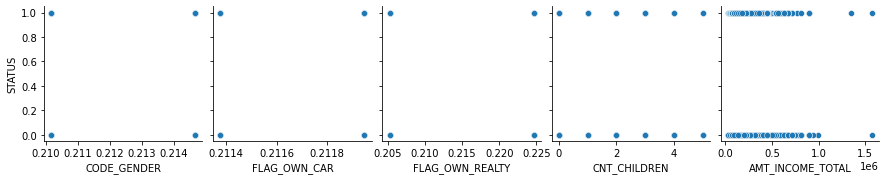

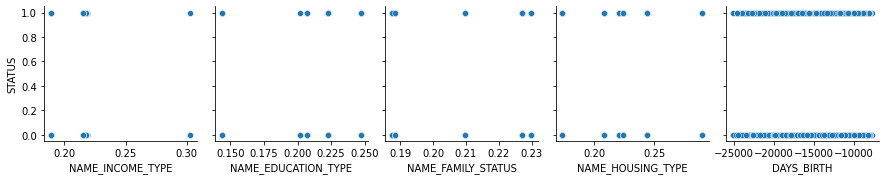

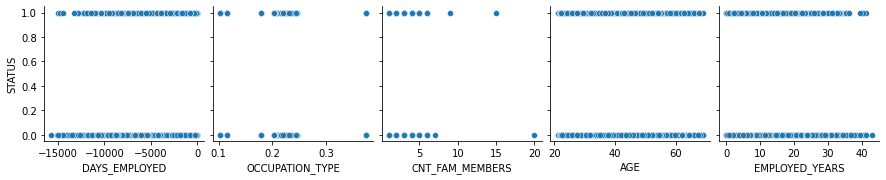

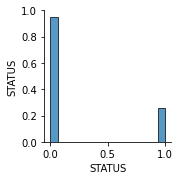

In [170]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['STATUS'])

In [171]:
from sklearn.preprocessing import StandardScaler

def scale_values(sdf, num_col_names, cat_col_names):
  X_num = sdf[num_col_names].to_numpy()
  X_cat = sdf[cat_col_names].to_numpy()

  # Be sure to scale all numeric features
  scaler = StandardScaler()
  X_num = scaler.fit_transform(X_num)

  X = np.concatenate((X_num, X_cat), axis=1)
  return X

#X1 = scale_values(part_1, num_col_names, cat_col_names)
#X2 = scale_values(part_2, num_col_names, cat_col_names)
X3 = scale_values(X_cleaned,num_col_names, cat_col_names)

X3_test = scale_values(X_test_cleaned,num_col_names, cat_col_names)


In [172]:


x_best_features = X_cleaned[best_features]

In [173]:
x_best_features.head()

,OCCUPATION_TYPE,DAYS_BIRTH,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_INCOME_TYPE,FLAG_OWN_REALTY,EMPLOYED_YEARS,CNT_FAM_MEMBERS,CNT_CHILDREN,DAYS_EMPLOYED,AGE
8897,0.216598,-13543,157500.0,0.223023,0.208671,0.227021,0.218035,0.205273,3.632877,2.0,0,-1326,37.104110
30453,0.216598,-16269,247500.0,0.223023,0.208671,0.209597,0.218035,0.224626,2.200000,2.0,0,-803,44.572603
24957,0.203664,-21466,135000.0,0.206750,0.208671,0.209597,0.218035,0.205273,21.857534,2.0,0,-7978,58.810959
2350,0.219561,-12774,67500.0,0.223023,0.208671,0.209597,0.215463,0.205273,1.416438,3.0,1,-517,34.997260
23409,0.203501,-9351,128542.5,0.223023,0.289694,0.229834,0.218035,0.224626,1.013699,1.0,0,-370,25.619178


In [174]:
from flaml import AutoML
automl_clf = AutoML()

In [ ]:
settings = {
    "time_budget": 600,  # total running time in seconds
    "metric": 'f1',  # primary metrics can be chosen from: ['accuracy','roc_auc','f1','log_loss','mae','mse','r2']
    "task": 'classification',  # task type    
    "estimator_list":['xgboost'],
    "log_file_name": 'x_light.log',  # flaml log file
}

automl_clf.fit(X3, y_train, **settings) 


[flaml.automl: 08-04 22:18:16] {912} INFO - Evaluation method: cv
[flaml.automl: 08-04 22:18:16] {606} INFO - Using StratifiedKFold
[flaml.automl: 08-04 22:18:16] {933} INFO - Minimizing error metric: 1-f1
[flaml.automl: 08-04 22:18:16] {953} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 08-04 22:18:16] {1019} INFO - iteration 0, current learner xgboost
[flaml.automl: 08-04 22:18:16] {1179} INFO -  at 0.2s,	best xgboost's error=1.0000,	best xgboost's error=1.0000
[flaml.automl: 08-04 22:18:16] {1019} INFO - iteration 1, current learner xgboost
[flaml.automl: 08-04 22:18:16] {1179} INFO -  at 0.3s,	best xgboost's error=1.0000,	best xgboost's error=1.0000
[flaml.automl: 08-04 22:18:16] {1019} INFO - iteration 2, current learner xgboost
[flaml.automl: 08-04 22:18:16] {1179} INFO -  at 0.4s,	best xgboost's error=1.0000,	best xgboost's error=1.0000
[flaml.automl: 08-04 22:18:16] {1019} INFO - iteration 3, current learner xgboost
[flaml.automl: 08-04 22:18:17] {1179} I

[flaml.automl: 08-04 22:18:24] {1019} INFO - iteration 41, current learner xgboost
[flaml.automl: 08-04 22:18:24] {1179} INFO -  at 7.9s,	best xgboost's error=0.9990,	best xgboost's error=0.9990
[flaml.automl: 08-04 22:18:24] {1019} INFO - iteration 42, current learner xgboost
[flaml.automl: 08-04 22:18:24] {1179} INFO -  at 8.2s,	best xgboost's error=0.9990,	best xgboost's error=0.9990
[flaml.automl: 08-04 22:18:24] {1019} INFO - iteration 43, current learner xgboost
[flaml.automl: 08-04 22:18:24] {1179} INFO -  at 8.4s,	best xgboost's error=0.9990,	best xgboost's error=0.9990
[flaml.automl: 08-04 22:18:24] {1019} INFO - iteration 44, current learner xgboost
[flaml.automl: 08-04 22:18:25] {1179} INFO -  at 8.6s,	best xgboost's error=0.9990,	best xgboost's error=0.9990
[flaml.automl: 08-04 22:18:25] {1019} INFO - iteration 45, current learner xgboost
[flaml.automl: 08-04 22:18:25] {1179} INFO -  at 8.9s,	best xgboost's error=0.9990,	best xgboost's error=0.9990
[flaml.automl: 08-04 22:1

[flaml.automl: 08-04 22:20:58] {1019} INFO - iteration 83, current learner xgboost
[flaml.automl: 08-04 22:21:07] {1179} INFO -  at 171.3s,	best xgboost's error=0.9636,	best xgboost's error=0.9636
[flaml.automl: 08-04 22:21:07] {1019} INFO - iteration 84, current learner xgboost
[flaml.automl: 08-04 22:21:18] {1179} INFO -  at 181.8s,	best xgboost's error=0.9333,	best xgboost's error=0.9333
[flaml.automl: 08-04 22:21:18] {1019} INFO - iteration 85, current learner xgboost
[flaml.automl: 08-04 22:21:21] {1179} INFO -  at 184.8s,	best xgboost's error=0.9333,	best xgboost's error=0.9333
[flaml.automl: 08-04 22:21:21] {1019} INFO - iteration 86, current learner xgboost
[flaml.automl: 08-04 22:21:32] {1179} INFO -  at 195.7s,	best xgboost's error=0.8523,	best xgboost's error=0.8523
[flaml.automl: 08-04 22:21:32] {1019} INFO - iteration 87, current learner xgboost
[flaml.automl: 08-04 22:21:40] {1179} INFO -  at 204.2s,	best xgboost's error=0.7412,	best xgboost's error=0.7412
[flaml.automl: 

In [176]:
y_pred = automl_clf.predict(X3_test)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_val, y_pred)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      1805
           1       0.10      0.01      0.01       474

    accuracy                           0.78      2279
   macro avg       0.45      0.50      0.44      2279
weighted avg       0.65      0.78      0.70      2279



In [166]:
X_test_scaled = scale_values(X_test_cleaned,num_col_names, cat_col_names)

y_pred1 = automl_clf.predict(X_test_scaled)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_val, y_pred1)

print(classification_report(y_val, y_pred1))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      4708
           1       0.52      0.41      0.46      2584

    accuracy                           0.66      7292
   macro avg       0.62      0.60      0.60      7292
weighted avg       0.64      0.66      0.65      7292



In [158]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(automl_clf, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

NotFittedError: This AutoML instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.